<a href="https://colab.research.google.com/github/anaisabelveg/tfm/blob/main/Regresion_lineal_simple_odometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias necesarias y configuramos matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

Selecciono el dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving transit_limpio.csv to transit_limpio.csv


Creo el dataframe a partir del dataset subido

In [ ]:
dfTransit = pd.read_csv("transit_limpio.csv")
print(dfTransit.head(10))

                 region  price    year  cylinders  fuel  odometer  \
0            birmingham  31900  2019.0          6     1   29497.0   
1            birmingham  32900  2019.0          6     1    6735.0   
2            birmingham  34500  2019.0          6     1    7646.0   
3            birmingham  32700  2019.0          6     1   13646.0   
4            birmingham  32900  2019.0          6     1    6735.0   
5            birmingham  34800  2019.0          6     1   31020.0   
6            birmingham  32800  2018.0          6     1   43479.0   
7            birmingham  38300  2020.0          6     1    7540.0   
8            birmingham  34800  2019.0          6     1   31020.0   
9  huntsville / decatur  14882  2015.0          6     1  151780.0   

   title_status  transmission  drive        lat       long  
0             1             1      1  36.464100 -86.658280  
1             1             1      1  36.464100 -86.658280  
2             1             1      1  36.464100 -86.65828

Veamos que correlacción existe entre las variables odometer, millas recorridas, y price

In [ ]:
corr_test = pearsonr(x = dfTransit['odometer'], y =  dfTransit['price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.6710983733962215
P-value:  2.507242329423192e-48


In [ ]:
# debia tener algun valor nulo, asi que lo elimino
odometerNull = dfTransit[dfTransit['odometer'].isna()].index
print(odometerNull)
dfTransit = dfTransit.drop(odometerNull)

Int64Index([], dtype='int64')


In [ ]:
dfTransit.to_csv("transit_limpio.csv", index=False)

In [ ]:
corr_test = pearsonr(x = dfTransit['odometer'], y =  dfTransit['price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.6710983733962215
P-value:  2.507242329423192e-48


<h1>********** Scikit-learn **********</h1>

Divido el dataframe con un 80% de entrenamiento y el resto 20% para el test.
Cremos el modelo LinearRegression

In [ ]:
X = dfTransit[['odometer']]
y = dfTransit['price']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

Obtenemos la información del modelo

In [ ]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [35852.83878239]
Coeficiente: [('odometer', -0.12712740872523956)]
Coeficiente de determinación R^2: 0.4495054448487298


Calculo el error del modelo

In [ ]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[22552.26077192]
 [30904.27727035]
 [28098.06685015]]

El error (rmse) de test es: 5130.355413511332


<h1>********** Statsmodels **********</h1>

In [ ]:
X = dfTransit[['price']]
y = dfTransit['odometer']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.22e-35
Time:                        19:45:30   Log-Likelihood:                -3407.7
No. Observations:                 287   AIC:                             6819.
Df Residuals:                     285   BIC:                             6827.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e+05   6841.393     22.323      0.0

Intervalos de confianza

In [ ]:
modelo.conf_int(alpha=0.05)

array([[ 1.39253464e+05,  1.66185602e+05],
       [-3.76099152e+00, -2.85550059e+00]])

Predicciones con intervalo de confianza del 95%

In [ ]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,38585.044386,2492.562564,33678.877152,43491.211620,-30125.323988,107295.412759
1,43878.238072,2304.418671,39342.398714,48414.077429,-24806.680825,112563.156968
2,47864.674566,2193.048338,43548.047954,52181.301179,-20806.116243,116535.465376
3,12119.075956,3845.616074,4549.662915,19688.488998,-56832.648162,81070.800075


Predicciones y grafico con intervalo de confianza del 95%

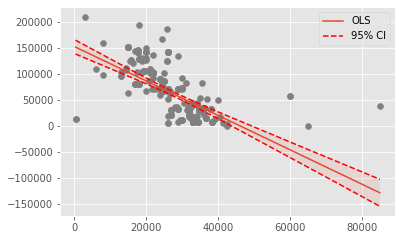

In [ ]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

Error de test del modelo

In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 25934.53701779279
